# Creating Weather API dataset to compare to our arrest/crime data charts

#### examples: https://api.meteostat.net/v1/history/monthly?station=71964&start=2009-01&end=2009-12&key=XXXXXXXX

#### examples: https://api.meteostat.net/v1/history/monthly?start=2019-01&end=2019-12&key={weather_key}&station=XXXXX
#### documentation: https://api.meteostat.net/#history-monthly
#### https://api.meteostat.net/v1/stations/search?q=los+angeles&key=MYKEYGETYOUROWN
#### https://meteostat.net/en
#### credit mentioning: brandon su^(our classmate) he found these info and was willing to share with us lol

In [1]:
#Dependencies and set up

import requests
from config import api_key
url = "https://api.meteostat.net/v1/history/monthly?"
startdate = '2010-01'
enddate = '2019-12'
stationnumber = '72295'
#query_url = f'start={startdate}&end={enddate}&key={api_key}&station={stationnumber}'
query_url = f'station={stationnumber}&start={startdate}&end={enddate}&key={api_key}'
print (url+query_url)

https://api.meteostat.net/v1/history/monthly?station=72295&start=2010-01&end=2019-12&key=GovH0pvL


In [2]:
import pandas as pd

year_month = []
temperature_mean = []


#temperature_data

response = requests.get(url+query_url).json()
response


{'meta': {'source': 'National Oceanic and Atmospheric Administration, Deutscher Wetterdienst'},
 'data': [{'month': '2010-01',
   'temperature_mean': 14.7,
   'temperature_mean_min': 10,
   'temperature_mean_max': 19.4,
   'temperature_min': 6.1,
   'temperature_max': 26.7,
   'precipitation': 109,
   'raindays': 8,
   'pressure': 1015.1,
   'sunshine': None},
  {'month': '2010-02',
   'temperature_mean': 14.2,
   'temperature_mean_min': 10.2,
   'temperature_mean_max': 18.2,
   'temperature_min': 5,
   'temperature_max': 26.7,
   'precipitation': 84,
   'raindays': 6,
   'pressure': 1015.1,
   'sunshine': None},
  {'month': '2010-03',
   'temperature_mean': 15.4,
   'temperature_mean_min': 11.2,
   'temperature_mean_max': 19.7,
   'temperature_min': 7.8,
   'temperature_max': 29.4,
   'precipitation': 5,
   'raindays': 1,
   'pressure': 1016.5,
   'sunshine': None},
  {'month': '2010-04',
   'temperature_mean': 14.7,
   'temperature_mean_min': 11.3,
   'temperature_mean_max': 18.1,
  

In [3]:
for row in response['data']:
    year_month.append(row['month'])
    temperature_mean.append(row['temperature_mean'])

temperature_data = pd.DataFrame({'Year_Month':year_month, 'Temperature':temperature_mean})

In [4]:
temperature_data

,Year_Month,Temperature
0,2010-01,14.7
1,2010-02,14.2
2,2010-03,15.4
3,2010-04,14.7
4,2010-05,16.1
...,...,...
115,2019-08,21.4
116,2019-09,23.0
117,2019-10,21.2
118,2019-11,17.6


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

import datetime as dt

import seaborn as sns



In [6]:
temperature_data['Year_Month'] = pd.to_datetime(temperature_data['Year_Month'])
temperature_data['Year'] = temperature_data['Year_Month'].dt.year
temperature_data['Month'] = temperature_data['Year_Month'].dt.month
temperature_data.head()

,Year_Month,Temperature,Year,Month
0,2010-01-01,14.7,2010,1
1,2010-02-01,14.2,2010,2
2,2010-03-01,15.4,2010,3
3,2010-04-01,14.7,2010,4
4,2010-05-01,16.1,2010,5


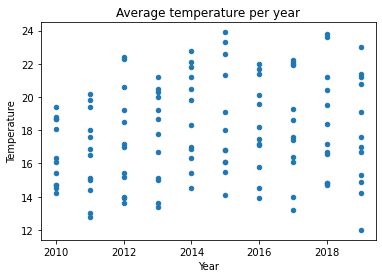

<Figure size 432x288 with 0 Axes>

In [7]:
temperature_data.plot(kind = 'scatter', x = 'Year', y='Temperature')
plt.title('Average temperature per year')
plt.show()
plt.savefig('../Group_4/Charts/average_temperature_per_year.png')

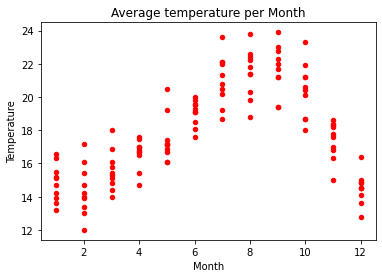

<Figure size 432x288 with 0 Axes>

In [8]:
temperature_data.plot(kind = 'scatter', x = 'Month', y='Temperature', color = 'red', )
plt.title('Average temperature per Month')
plt.show()
plt.savefig('../Group_4/Charts/average_temperature_per_month.png')